In [117]:
#  TODO Formaliser le pb autrement qu'une simple classification ? Plutôt similarité avec certains concepts 'e-commerce'.
# Phrases plutôt que mots ?
# TODO définir une liste de concepts / mots clés
# TODO trouver les phrases / commentaires qui contiennent ces mots clés avec du rule based matching ou du word embedding / similarity
# TODO enrichir le vocabulaire avec des synonymes (wordnet, gpt , embedding ?)
# TODO via de la similarité, trouver les phrases qui sont similaires à ces concepts



# autres idées :  
# kmeans mots similaires pour identifier les synonymes des concepts ?


# pre-proc

In [38]:
import pandas as pd
df = pd.read_csv('processed_dataset.csv')
df["month"] = df.date.apply(lambda x: x[:-3]);
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)
df[['Commentaire','star','month','company']].head(5)

,Commentaire,star,month,company
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",1,2023-03,Amazon
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,1,2023-03,Amazon
2,"Dieu sait que j'en connais des déboires avec les sites marchands. Amazon n'échappe pas à la règle, il m'arrive d'expérimenter quelques désagréments. CEPENDANT, je n'ai rien à redire sur le service client d'Amazon. Les agents sont vraiment tournés vers la satisfaction du client. Ca change des autres commerces. Etant Prime, les livraisons rapides et retours gratuits sont très appréciables. Les autres commerces devraient s'en inspirer !!!",4,2023-03,Amazon
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",1,2023-03,Amazon
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir avec eux,1,2023-03,Amazon


In [94]:
df[((df['star']==2) | (df['star']==1)) & (df['company']=="CDiscount")][['Commentaire','star','date','company']].head(5)

,Commentaire,star,date,company
9921,J'ai commandé une friteuse référencé et je reçois un autre modèle d'une autre marque. Malgré leur erreur impossible d'obtenir la réexpédition de ma vrai commande. La demande de retour et le délai de remboursement sont une vaste supercherie. cdiscount a fini par m'avouer il faut commander des produits vendu que par cdiscount. Alors pourquoi laisser des revendeurs agir sur leur plate-forme ? Plus jamais cdiscount. Des dialogues de sourds.,1,2023-03-08,CDiscount
9922,"Après avoir commandé un lave linge bosch, pas de nouvelles concernant la livraison dans un point relais 2 jours après la date prévue. Je contacte Cdiscount qui enquête... 4 jours plus tard, on me signifie un remboursement et on m'invite à recommander la machine qui est 50€ plus chère. Je contacte le service client qui ne peut rien faire mais dont un responsable va me rappeler dans l'heure. 1 jours plus tard, pas de nouvelles... Client depuis plus de 20 ans, c'était ma dernière commande à Cdiscount.",1,2023-03-08,CDiscount
9923,"Bonjour Attention à fuir Achat effectué avec une demande de carte cdiscount, afin de profiter d'une réduction ( 150€ ) +ou- factice ...Cependant demande de carte cdiscount refusé , message reçu de cdiscount commande annulé . Mais compte bancaire prélevé du montant total sans réductions bien évidemment ;) J'adore ce type d'arnaque Avec reduction attrape pigeon. Apres appel ,oui nous allons vous rembourser mais cela prend du temps ... :) Bref 4 jours sans remboursement. Commande Référence : 235525939 - 2303051457W84Z7",1,2023-03-08,CDiscount
9924,"En tant que client je vis un cauchemar ! Le Canapé est défectueux, donc je demande à le renvoyer, après 3 rendez-vous annulé par votre partenaire CCHEZVOUS, je suis vraiment agacé par cette situation. En globalité je suis très déçu je n’ai jamais vu un service aussi lamentable, (reprise ancien matériel, respect des rendez-vous, un service client qui ne sais pas résoudre réellement les problèmes, peu de respect pour sa clientèle. Honnêtement fuyez cette entrepris si vous ne voulez pas être déçu et stressé dû à leur manque de professionnalisme.",1,2023-03-08,CDiscount
9925,"Le service client cdiscount est déplorable ! 4 mois et plusieurs appels payant et toujours rien ! Il me font tourner en rond en espérant que j'abandonne sans doute ! Je trouve ça tellement malhonnête ! Je ne sais pas comment il font pour avoir 4,2 étoiles c'est sans doute trafiqué",1,2023-03-09,CDiscount


In [45]:
low_ratings = df[((df['star']==2) | (df['star']==1))]

# Concepts définition

In [4]:
# concepts et synonymes
concepts_json = {
    #"livraison": ["livraison", "expédition", "envoi", "acheminement", "transport", "réception"],
    #"retour": ["retour", "remboursement", "échange", "réexpédition"],
    "casse": ["cassé", "abîmé", "endommagé", "dégradation", "brisé","détruit","détérioré"],
    "vol": ["vide", "vol", "dérobé", "disparu", "perdu"],
    "défectueux": ["défectueux","dysfonctionnel"],
    "contrefaçon": ["faux", "copie", "imitation"],
    "panne": ["panne", "défaillance", "réparation"],
    "vendeurs": ["vendeur", "revendeur", "seller", "partenaire", "fournisseur","marketplace"]
}


# Rule based : word matching

In [140]:
def display_comments_with_labels(comments_series, labels_df):
    return pd.concat([comments_series,labels_df], axis=1)

def search_concept_kws_in_comments(concepts_json, comments_series):
    df = pd.DataFrame()
    # pd.options.mode.copy_on_write = True
    print('% of labeled comments based on keywords: ')
    for concept, syns in concepts_json.items():
        # build label column
        key = 'LABEL_' + concept
        df[key] = comments_series.apply(lambda x: any([syn in x for syn in syns]))
        # print stats over column
        percentage = df[key].mean() * 100
        print('   - ',f"{concept} {syns}: {percentage:.3f}%")
    percentage_of_total_w_label = df.any(axis=1).mean() * 100
    print(f"% of comments with at least 1 label: {percentage_of_total_w_label:.3f}%")
    return df

labels_kw_based =  search_concept_kws_in_comments(concepts_json, low_ratings['Commentaire'])
#display(labels_kw_based.head(10))
display_comments_with_labels(low_ratings['Commentaire'], labels_kw_based).head(10)


% of labeled comments based on keywords: 
   -  casse ['cassé', 'abîmé', 'endommagé', 'dégradation', 'brisé', 'détruit', 'détérioré']: 4.152%
   -  vol ['vide', 'vol', 'dérobé', 'disparu', 'perdu']: 18.687%
   -  défectueux ['défectueux', 'dysfonctionnel']: 2.123%
   -  contrefaçon ['faux', 'copie', 'imitation']: 2.444%
   -  panne ['panne', 'défaillance', 'réparation']: 5.345%
   -  vendeurs ['vendeur', 'revendeur', 'seller', 'partenaire', 'fournisseur', 'marketplace']: 15.847%
% of comments with at least 1 label: 39.388%


,Commentaire,LABEL_casse,LABEL_vol,LABEL_défectueux,LABEL_contrefaçon,LABEL_panne,LABEL_vendeurs
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",False,False,False,False,False,False
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,False,True,False,False,False,False
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",False,True,False,False,False,False
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir avec eux,False,True,False,False,False,False
5,"D'habitude, je jure par Amazon. J'ai aussi un compte Business et j'ai Prime depuis presque son lancement. Mais, j'ai acheté des enceintes bluetooth et alors qu'ils étaient toujours sous garantie j'ai fait la demande de remplacement parce ce qu'ils saturées et celle de droite et très faible par rapport de celle de gauche. Mais, ils étaient en rupture de stock. Amazon m'a dit qu'il les remplacerai lorsque qu'ils y arriver. Alors, j'ai patienté. Maintenant hors garantie, Amazon ne répond même pas à mes messages. Vous êtes prévenus.",False,False,False,False,False,False
6,Quand tu commandes 1 gros objet chez Amazon le livreur ne vient jamais à la date indiqué c est franchement pénible et desagreable faudrait peut être pensé à changé vos service de livraison pour l électroménager etc..,False,False,False,False,False,False
7,"Mon disque SSD SANDISK vendu par Amazon et sous garantie est tombé en panne. Amazon m'écrit de renvoyer le disque dur chez le constructeur, ce que je fais. SANDISK m'indique que mon disque dur n'est pas réparable et me confirme que je dois obtenir le remboursement auprès du vendeur AMAZON. (ce qui est conforme à la législation Française).Amazon refuse tout remboursement et me dit que j'aurais dû leur renvoyer le disque dur pour être remboursé...Amazon se moque de plus en plus de ses clients",False,False,False,False,True,True
8,"Commande d'un produit tupperware. produit cassé encore sous garantie. Fournisseur ne répond pas à mes relances ni à celle d'AMAZON. Réponse de ce dernier, nous ne pouvons rien faire, essayer d'appeler le fabricant tuperware.Amazon vend mais n'assume plus rien dérrière !!",True,False,False,False,False,False
10,"Un colis devait nous être livré ce jour entre 8 et 22 heures. La livraison avait été reportée. Aucun livreur n'est passé. Le suivi du colis est impossible même pour le service client. Les discussions en ligne sont brouillonnes et laborieuses avec des interlocuteurs qui ne maîtrisent pas le Français. Après de multiples connexions et tentatives pour contacter le service client, j'ai enfin réussi à faire annuler la commande. Reste à vérifier que le remboursement suit... Je n'avais jamais expérimenté la livraison directe par Amazon. Désormais, je m'abstiendrai de commander des articles volumineux.",False,True,False,False,False,False
11,"De pire en pire. En effectuant la sois traitance des livraisons, les colis 

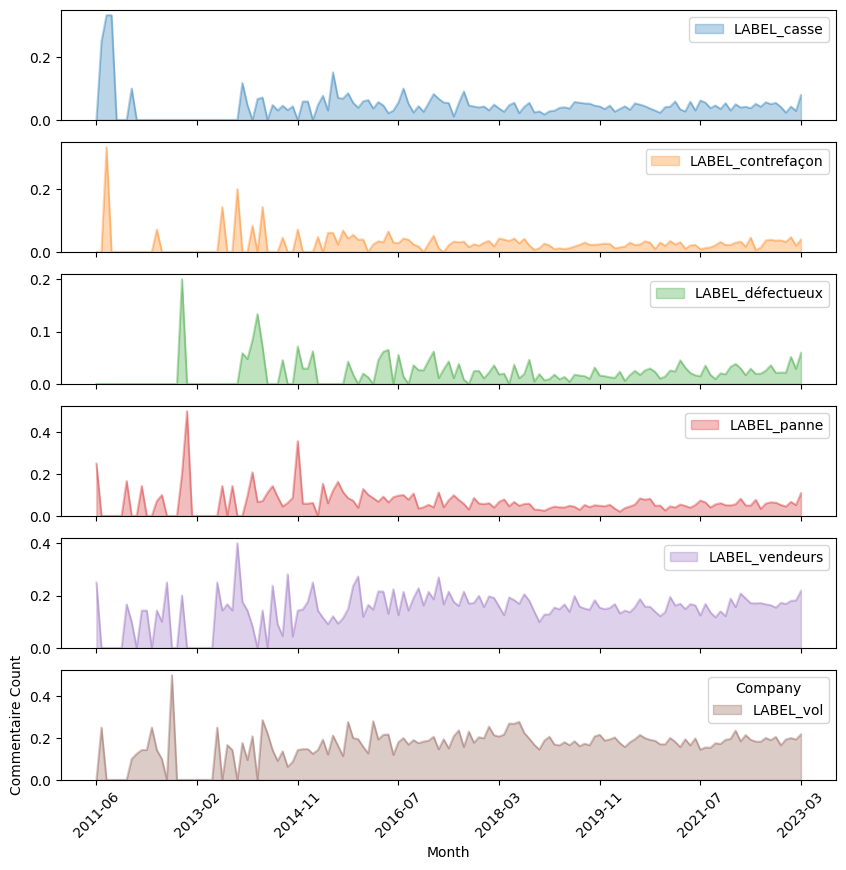

In [139]:
import matplotlib.pyplot as plt

df_plot = pd.concat([low_ratings[['Commentaire','month','company']], labels_kw_based], axis=1)
nb_of_labels_found_per_month = df_plot.pivot_table(values=list(labels_kw_based.columns),
                                  index='month',
                                  columns=None,
                                  aggfunc='sum')


# oon normalise les valeurs avec total des commentaires du mois pour avoir des pourcentages
nb_of_reviews_per_month = df_plot.pivot_table(values='Commentaire',
                                  index='month',
                                  columns=None,
                                  aggfunc='count')

nb_of_labels_found_per_month = pd.concat([nb_of_labels_found_per_month, nb_of_reviews_per_month], axis=1)
nb_of_labels_found_per_month = nb_of_labels_found_per_month.divide(nb_of_reviews_per_month['Commentaire'],axis=0) # on div
nb_of_labels_found_per_month = nb_of_labels_found_per_month.drop(columns=['Commentaire'])

# chart
nb_of_labels_found_per_month.plot(kind='area',
                 stacked=True,
                 alpha=0.3,
                 figsize=(10, 10),
                 #ylim=(0, pivot_table.max(axis=1).max()),
                 subplots=True
                 )
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Commentaire Count')
plt.legend(title='Company')
plt.show()




['LABEL_casse',
 'LABEL_vol',
 'LABEL_défectueux',
 'LABEL_contrefaçon',
 'LABEL_panne',
 'LABEL_vendeurs',
 'Commentaire']

# Word similarity w. spaCy

In [ ]:
# TODO
    # pourquoi scores si élevés ?
    # why empty vecs ? out of vocab ?
    # comparer plutôt des embeddings de n_grams (plutôt que des moyennes d'embeddings sur des phrases) ?
    # tri-gram embeddings dans exam embeddings ?
    # wordnet for negation ? 

# DOES NOT WORK
    # ne garder que les top scores ? --> spacy sentences vects = avg of token vectors  ---> = avg des top scores = top des avgs

In [5]:
# similarité mot à mot
import spacy
#spacy.cli.download("fr_core_news_lg")
#nlp = spacy.load("fr_core_news_lg")
nlp = spacy.load("fr_core_news_md")


# tokenize/vectorize the concepts
concepts_phrases = [(concept, ' '.join(syns) )for concept, syns in concepts_json.items()]
concepts_docs = [(c, nlp(p)) for c,p in concepts_phrases]
# TODO check this, it might be wrong

In [6]:
concepts_phrases

[('casse', 'cassé abîmé endommagé dégradation brisé détruit détérioré'),
 ('vol', 'vide vol dérobé disparu perdu'),
 ('défectueux', 'défectueux dysfonctionnel'),
 ('contrefaçon', 'faux copie imitation'),
 ('panne', 'panne défaillance réparation'),
 ('vendeurs', 'vendeur revendeur seller partenaire fournisseur marketplace')]

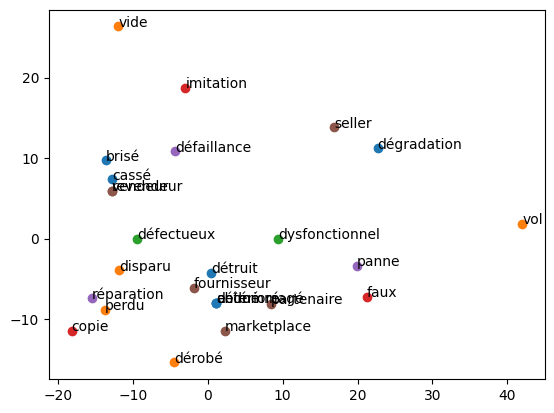

In [7]:
# PCA of concepts kws
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

for c, docs in concepts_docs:
    words = [tok.text for tok in docs]
    words_vec = [tok.vector for tok in docs]

    reduced_vectors = PCA(n_components=2).fit_transform(words_vec)
    df =  pd.DataFrame(reduced_vectors)
    df['words'] = words

    plt.scatter(df[0], df[1])
    for i, word in enumerate(words):
        plt.annotate(word, (df[0][i], df[1][i]))

plt.show()


In [29]:
import itertools

def compare(w_list):

    df = pd.DataFrame(columns=w_list, index=w_list)
    df = df.fillna('-')
    df['mean similarity w.all'] = '-'

    
    for c, w1 in enumerate(w_list):
        # compute similarity between each word pair
        for w2 in w_list[c:]:
            sim = nlp(w1).similarity(nlp(w2))
            df.loc[w1,w2] = sim
            df.loc[w2,w1] = sim
        # compute mean similarity with all words
        df.loc[w1, 'mean similarity w.all'] = nlp(w1).similarity(nlp(' '.join(w_list)))
    return df

#w_list = ['jamais reçu', 'pas livré', 'non reçu']
#compare(w_list)

In [27]:
for c, c_kws in concepts_json.items():
    print('---',c,'---')
    display(compare(c_kws))

--- casse ---


,cassé,abîmé,endommagé,dégradation,brisé,détruit,détérioré,mean similarity w.all
cassé,1.0,0.56348,0.56348,0.058803,0.662506,0.374906,0.56348,0.707815
abîmé,0.56348,1.0,1.0,0.345595,0.472194,0.68265,1.0,0.923466
endommagé,0.56348,1.0,1.0,0.345595,0.472194,0.68265,1.0,0.923466
dégradation,0.058803,0.345595,0.345595,1.0,0.028018,0.293285,0.345595,0.457208
brisé,0.662506,0.472194,0.472194,0.028018,1.0,0.543826,0.472194,0.687088
détruit,0.374906,0.68265,0.68265,0.293285,0.543826,1.0,0.68265,0.788044
détérioré,0.56348,1.0,1.0,0.345595,0.472194,0.68265,1.0,0.923466


--- vol ---


,vide,vol,dérobé,disparu,perdu,mean similarity w.all
vide,1.0,0.063142,0.08598,0.231086,0.250537,0.487344
vol,0.063142,1.0,0.281201,0.040604,0.072684,0.617731
dérobé,0.08598,0.281201,1.0,0.44232,0.581906,0.719102
disparu,0.231086,0.040604,0.44232,1.0,0.65191,0.624832
perdu,0.250537,0.072684,0.581906,0.65191,1.0,0.709029


--- défectueux ---


,défectueux,dysfonctionnel,mean similarity w.all
défectueux,1.0,0.618918,0.883131
dysfonctionnel,0.618918,1.0,0.915063


--- contrefaçon ---


,faux,copie,imitation,mean similarity w.all
faux,1.0,0.19904,0.200069,0.69208
copie,0.19904,1.0,0.296559,0.739424
imitation,0.200069,0.296559,1.0,0.657674


--- panne ---


,panne,défaillance,réparation,mean similarity w.all
panne,1.0,0.52384,0.335462,0.791906
défaillance,0.52384,1.0,0.677099,0.860638
réparation,0.335462,0.677099,1.0,0.805109


--- vendeurs ---


,vendeur,revendeur,seller,partenaire,fournisseur,marketplace,mean similarity w.all
vendeur,1.0,1.0,0.166012,0.28641,0.586989,0.340788,0.815532
revendeur,1.0,1.0,0.166012,0.28641,0.586989,0.340788,0.815532
seller,0.166012,0.166012,1.0,0.296325,0.173875,0.072648,0.460037
partenaire,0.28641,0.28641,0.296325,1.0,0.55711,0.454406,0.672466
fournisseur,0.586989,0.586989,0.173875,0.55711,1.0,0.540179,0.809665
marketplace,0.340788,0.340788,0.072648,0.454406,0.540179,1.0,0.632601


In [28]:
  
display(compare(['jamais reçu', 'pas livré', 'non reçu', 'non recu', 'pas reçu','recu','jamais','pas']))
display(compare(['pas','non','jamais']))


,jamais reçu,pas livré,non reçu,non recu,pas reçu,recu,jamais,pas,mean similarity w.all
jamais reçu,1.0,0.583405,0.731253,0.731253,0.879967,0.832402,0.521099,0.394334,0.894229
pas livré,0.583405,1.0,0.489591,0.489591,0.815964,0.209646,0.72906,0.874177,0.807107
non reçu,0.731253,0.489591,1.0,1.0,0.734455,0.677747,0.274709,0.344512,0.853565
non recu,0.731253,0.489591,1.0,1.0,0.734455,0.677747,0.274709,0.344512,0.853565
pas reçu,0.879967,0.815964,0.734455,0.734455,1.0,0.643577,0.595482,0.721619,0.968014
recu,0.832402,0.209646,0.677747,0.677747,0.643577,1.0,-0.03922,-0.065449,0.647361
jamais,0.521099,0.72906,0.274709,0.274709,0.595482,-0.03922,1.0,0.811826,0.61537
pas,0.394334,0.874177,0.344512,0.344512,0.721619,-0.065449,0.811826,1.0,0.676496


,pas,non,jamais,mean similarity w.all
pas,1.0,0.532864,0.811826,0.923795
non,0.532864,1.0,0.411568,0.785564
jamais,0.811826,0.411568,1.0,0.836244


Les mots au sein d'un concept ne sont pas forcément extrèmement lié ou synonymes

--> il faut probablement que je compare les mots des phrases à chaque mot du concept plutôt qu'au vecteur moyen du concept ?

In [100]:
nlp('baguette').similarity(nlp('pas'))

0.21295435388295209

In [85]:
print(nlp('jamais').vector[:10])
print(nlp('reçu').vector[:10])
print(vec1[:10])
print(nlp("jamais reçu").vector[:10])

[ 0.9697 -1.5164 -3.5499  1.916   2.5364  3.5766 -1.0923  1.3689 -1.0448
  1.2934]
[ 1.0346   2.127    2.2386   0.50972  1.1162  -1.8024   1.3044  -0.83534
  3.7338   1.2948 ]
[ 2.0043      0.6106001  -1.3113      2.42572     3.6526      1.7742001
  0.21209991  0.5335599   2.689       2.5882    ]
[ 1.00215     0.30530006 -0.65565     1.21286     1.8263      0.88710004
  0.10604995  0.26677996  1.3445      1.2941    ]


La moyenne des vecteurs a la même direction que la somme, seule la norme change.

## similarité appliquée à toutes les phrases (non satisfaisant)

In [99]:
txt="En tant que client je vis un cauchemar ! Le Canapé est défectueux, donc je demande à le renvoyer, après 3 rendez-vous annulé par votre partenaire CCHEZVOUS, je suis vraiment agacé par cette situation. En globalité je suis très déçu je n’ai jamais vu un service aussi lamentable, (reprise ancien matériel, respect des rendez-vous, un service client qui ne sais pas résoudre réellement les problèmes, peu de respect pour sa clientèle. Honnêtement fuyez cette entrepris si vous ne voulez pas être déçu et stressé dû à leur manque de professionnalisme.	"
doc = nlp(txt)
for c,c_doc in concepts_docs:
    print(c,':',doc.similarity(c_doc))

casse : 0.3523689337266624
vol : 0.25886251603063254
défectueux : 0.5232937430647919
contrefaçon : 0.3841816404860903
panne : 0.3813749797608672
vendeurs : 0.4417261278986656


In [67]:
low_ratings_small = low_ratings.iloc[:50,:]

def get_similarity_of_kws_with_comments(concepts_json, comments_series):
    concepts_phrases = [(concept, ' '.join(syns) )for concept, syns in concepts_json.items()]
    concepts_docs = [(c, nlp(p)) for c,p in concepts_phrases]
    df = pd.DataFrame()
    for c,c_doc in concepts_docs:
        key = 'SIM_' + c
        df[key] = comments_series.apply(lambda x: nlp(x).similarity(c_doc))
    return df

sim_scores = get_similarity_of_kws_with_comments(concepts_json, low_ratings_small['cleaned_lemma'])


In [130]:
display_comments_with_labels(low_ratings_small['cleaned_lemma'], sim_scores).head(10)

,cleaned_lemma,SIM_casse,SIM_vol,SIM_défectueux,SIM_contrefaçon,SIM_panne,SIM_vendeurs
0,colis commander mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapable chronopost pareilservic client veule patient journée plusle colis introuvable chronopost renvoyer balle amazonamazon vouloir renvoyer article ca semaine attendre colis,0.303806,0.270822,0.473405,0.333507,0.402766,0.577306
1,amazon politique pire contrairement site marchand.montr défectueux rendre jour remboursement méthode voleur voyou téléphone incompétent version jour retouramazon fuir dernier fois commande concurrence professionnel,0.357140,0.250429,0.649734,0.511585,0.549180,0.665096
3,prelev commande jamais recevoir service client laisse blanc jusque raccrocher appel amazone voler dernier commande passer apprendre vouloir acheter americain,0.402142,0.352229,0.573832,0.470105,0.481737,0.664260
4,colis dire livrer jamais recevoir perdre non rembourser falsification bon livraison dire signer soin signature majuscule mdr signe jamais document majuscule moquer client résilier aboment amazon prime finir,0.303772,0.224423,0.560310,0.532510,0.411288,0.640485
5,habitude jurer amazon compte busines prime presque lancement acheter enceinte bluetooth garantie demande remplacement saturer droite faible rapport gauche rupture stock amazon remplacer arriver patienter garantie amazon répondre message être prévenir,0.410641,0.249739,0.691795,0.490150,0.599472,0.673050
6,commande gros objet amazon livreur venir jamais date indiquer franchement pénible desagreabl falloir penser changer service livraison électroménager ..,0.373097,0.276378,0.608130,0.483731,0.513523,0.696019
7,disque ssd sandisk vendre amazon garantie tomber panne amazon écrire renvoyer disque dur constructeur sandisk indique disque dur réparable confirmer devoir obtenir remboursement auprès vendeur amazon conforme législation française).amazon refuser remboursement avoir devoir renvoyer disque dur rembourser ... amazon moque client,0.372797,0.253370,0.616043,0.479654,0.516786,0.683188
8,commande produit tupperware produit cassé garantie fournisseur répondre relance amazon réponse dernier pouvoir rien faire essayer appeler fabricant tuperware.amazon vendre assumer rien dérrière,0.412322,0.296643,0.631582,0.483514,0.536810,0.732879
10,colis devoir livrer jour heure livraison être reporter aucun livreur passer suivi colis impossible service client discussion ligne brouillonner laborieux interlocuteur maîtriser français multiple connexion tentative contacter service client réussir faire annuler commande vérifier remboursement ... jamais expérimenter livraison amazon abstenir commander article volumineux,0.321150,0.229779,0.689135,0.495607,0.569119,0.740036
11,pire pire effectuer être traitance livraison colis livrer site noter colis livré.la pire chose commentaire écrire remettre main propre présent rien réceptionné.ce souci récurrent amazon cacahuète brasser milliard euro ... appeler patienter 48h foutage g***il devoir bouger auprès traitant bosser,0.348464,0.289747,0.576005,0.483412,0.452058,0.629190


In [71]:

doc = nlp(' '.join(low_ratings_small['cleaned_lemma'].iloc[:10]))
words =  pd.Series(doc.text.split())
sim_scores = get_similarity_of_kws_with_comments(concepts_json,words)
for c in sim_scores.columns:
    #print(c, sim_scores[c].mean())
    sim_scores.loc[sim_scores.loc[:,c] < 0.7, c] = np.nan

display_comments_with_labels(words, sim_scores)

/var/folders/xw/p8djpszd6z17wyxbg9g6d66h0000gn/T/ipykernel_94946/2350847122.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df[key] = comments_series.apply(lambda x: nlp(x).similarity(c_doc))
/var/folders/xw/p8djpszd6z17wyxbg9g6d66h0000gn/T/ipykernel_94946/2350847122.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df[key] = comments_series.apply(lambda x: nlp(x).similarity(c_doc))
/var/folders/xw/p8djpszd6z17wyxbg9g6d66h0000gn/T/ipykernel_94946/2350847122.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df[key] = comments_series.apply(lambda x: nlp(x).similarity(c_doc))
/var/folders/xw/p8djpszd6z17wyxbg9g6d66h0000gn/T/ipykernel_94946/2350847122.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df[key] = comments_series.apply(lambda x: nlp(x).similarity(c_doc))
/var/folders/xw/p8djpszd6z17wyxbg9g6d66h0000gn/T/ipykernel_94946/2350847122.py:9: UserWarning: [W008] Evaluating

,0,SIM_casse,SIM_vol,SIM_défectueux,SIM_contrefaçon,SIM_panne,SIM_vendeurs
0,colis,NaN,NaN,NaN,NaN,NaN,NaN
1,commander,NaN,NaN,NaN,NaN,NaN,NaN
2,mardi,NaN,NaN,NaN,NaN,NaN,NaN
3,fevrier,NaN,NaN,NaN,NaN,NaN,NaN
4,livraison,NaN,NaN,NaN,NaN,NaN,NaN
5,jeudi,NaN,NaN,NaN,NaN,NaN,NaN
6,mars,NaN,NaN,NaN,NaN,NaN,NaN
7,produit,NaN,NaN,NaN,NaN,NaN,NaN
8,non,NaN,NaN,NaN,NaN,NaN,NaN
9,recu,NaN,NaN,NaN,NaN,NaN,NaN


# Similarity w. FAISS

https://github.com/facebookresearch/faiss

https://github.com/facebookresearch/faiss/wiki

Seems to be using Euclidean distance instead of cosine similarity. Maybe more precise fore my purpose ?

Need conda ?


Semantic search with FAISS : https://huggingface.co/learn/nlp-course/chapter5/6?fw=pt 

or with fasttext ? glove ?

In [ ]:
# is avg of word vectors to make for a sentence vector any meaningful ?

# Sentence embeddings

the different approaches : 
https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

doc2vec = https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

# Other data formatting techniques from RAGs


https://medium.com/@cdg2718/why-your-rag-doesnt-work-9755726dd1e9
https://colab.research.google.com/drive/1qo_Aq_gLTXq4hP7SAmZl6j4TeCp-QyBQ?usp=sharing#scrollTo=EX7P8lMhmb5u
- compute similarity with similar comments (comparing apples to apples)
- comparing to noise similarity (unrelevent)

Synthetic data : https://eugeneyan.com/writing/synthetic/?utm_medium=email&_hsmi=296337172&utm_content=296339630&utm_source=hs_email


Open AI embeddings : https://platform.openai.com/docs/guides/embeddings


About embeddings:
https://simonwillison.net/2023/Oct/23/embeddings/#what-are-embeddings